# Frequentist Inference Case Study - Part B

## Learning objectives

Welcome to Part B of the Frequentist inference case study! The purpose of this case study is to help you apply the concepts associated with Frequentist inference in Python. In particular, you'll practice writing Python code to apply the following statistical concepts: 
* the _z_-statistic
* the _t_-statistic
* the difference and relationship between the two
* the Central Limit Theorem, including its assumptions and consequences
* how to estimate the population mean and standard deviation from a sample
* the concept of a sampling distribution of a test statistic, particularly for the mean
* how to combine these concepts to calculate a confidence interval

In the previous notebook, we used only data from a known normal distribution. **You'll now tackle real data, rather than simulated data, and answer some relevant real-world business problems using the data.**

## Hospital medical charges

Imagine that a hospital has hired you as their data scientist. An administrator is working on the hospital's business operations plan and needs you to help them answer some business questions. 

In this assignment notebook, you're going to use frequentist statistical inference on a data sample to answer the questions:
* has the hospital's revenue stream fallen below a key threshold?
* are patients with insurance really charged different amounts than those without?

Answering that last question with a frequentist approach makes some assumptions, and requires some knowledge, about the two groups.

We are going to use some data on medical charges obtained from [Kaggle](https://www.kaggle.com/easonlai/sample-insurance-claim-prediction-dataset). 

For the purposes of this exercise, assume the observations are the result of random sampling from our single hospital. Recall that in the previous assignment, we introduced the Central Limit Theorem (CLT), and its consequence that the distributions of sample statistics approach a normal distribution as $n$ increases. The amazing thing about this is that it applies to the sampling distributions of statistics that have been calculated from even highly non-normal distributions of data! Recall, also, that hypothesis testing is very much based on making inferences about such sample statistics. You're going to rely heavily on the CLT to apply frequentist (parametric) tests to answer the questions in this notebook.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t
from numpy.random import seed
medical = pd.read_csv('insurance2.csv')

In [3]:
medical.shape

(1338, 8)

In [4]:
medical.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


__Q1:__ Plot the histogram of charges and calculate the mean and standard deviation. Comment on the appropriateness of these statistics for the data.

__A:__ 

**Appropriateness of Mean and Standard Deviation:**

The distribution of medical charges is **heavily right-skewed** (not normally distributed), with most patients having lower charges and a long tail of high-cost cases. 

**Concerns:**
- The **mean** is pulled upward by extreme values (expensive treatments), making it less representative of a "typical" patient charge
- The **standard deviation** is very large relative to the mean, indicating high variability and the presence of outliers
- These statistics assume the data is roughly symmetric, which is clearly not the case here

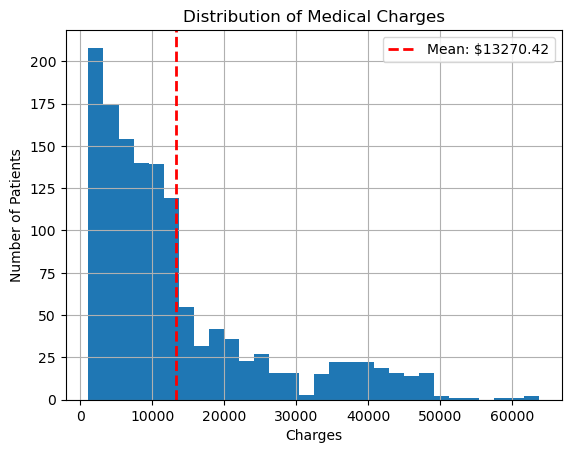

Mean: $13270.42
Standard Deviation: $12110.01


In [9]:
# Calculate mean
mean_charge = np.mean(medical['charges'])
std_charge = np.std(medical['charges'], ddof=1)

# Plot histogram
_ = medical['charges'].hist(bins=30)
_ = plt.xlabel('Charges')
_ = plt.ylabel('Number of Patients')
_ = plt.title('Distribution of Medical Charges')
# Add vertical line for mean
plt.axvline(mean_charge, color='red', linestyle='--', linewidth=2, label=f'Mean: ${mean_charge:.2f}')
plt.legend()
plt.show()

print(f"Mean: ${mean_charge:.2f}")
print(f"Standard Deviation: ${std_charge:.2f}")

__Q2:__ The administrator is concerned that the actual average charge has fallen below 12,000, threatening the hospital's operational model. On the assumption that these data represent a random sample of charges, how would you justify that these data allow you to answer that question? And what would be the most appropriate frequentist test, of the ones discussed so far, to apply?

__A:__

**Justification for using these data:**

1. **Random sampling assumption**: We're told these data represent a random sample of charges from the hospital, meaning they're representative of the overall population of patients

2. **Central Limit Theorem**: Even though the distribution of individual charges is heavily right-skewed (not normal), the CLT tells us that the **sampling distribution of the mean** will be approximately normal with a sufficiently large sample size. With n=1338, we have more than enough data for the CLT to apply.

3. **What we can infer**: Because the sampling distribution of the mean is approximately normal, we can use frequentist statistical tests to make inferences about the true population mean, even though individual charges don't follow a normal distribution.

**Most appropriate test:**

A **one-sample t-test** would be most appropriate because:
- We're testing a hypothesis about a single population mean
- We don't know the true population standard deviation, so we must estimate it from our sample using s
- We use the t-distribution rather than z-distribution to account for the uncertainty in estimating standard deviation from the sample

The hypothesis would be:
- 1: mean >= $12,000 (hospital is meeting operational requirements)
- 2: mean < $12,000 (hospital revenue has fallen below threshold)

This is a **one-sided test** since we're specifically concerned about the mean falling below $12,000.

__Q3:__ Given the nature of the administrator's concern, what is the appropriate confidence interval in this case? A ***one-sided*** or ***two-sided*** interval? (Refresh your understanding of this concept on p. 399 of the *AoS*). Calculate the critical value and the relevant 95% confidence interval for the mean, and comment on whether the administrator should be concerned.

__A:__  

**Type of Confidence Interval:**

A **one-sided** confidence interval is appropriate because:
- The administrator's concern is specifically about whether the mean has fallen **below** $12,000
- We only care about the lower bound of the confidence interval
- We want to answer: "Can we be 95% confident that the true mean is at least X dollars?"

For a **two-sided** interval, we'd be asking "where does the mean lie between an upper and lower bound?" which isn't the administrator's question.

In [10]:
# Sample statistics (already calculated in Q1)
n = len(medical['charges'])
sample_mean = mean_charge
sample_std = std_charge

print(f"Sample size: {n}")
print(f"Sample mean: ${sample_mean:.2f}")
print(f"Sample std: ${sample_std:.2f}")

Sample size: 1338
Sample mean: $13270.42
Sample std: $12110.01


In [11]:
# Calculate critical t-value for one-sided 95% CI
# For a one-sided test at 95% confidence, we use alpha = 0.05
# We want the lower bound, so we use t.ppf(0.05, df)

df = n - 1
t_critical = t.ppf(0.05, df)  # Left tail for lower bound
print(f"Degrees of freedom: {df}")
print(f"Critical t-value (one-sided, 95%): {t_critical:.4f}")

# Standard error
se = sample_std / np.sqrt(n)
print(f"Standard error: ${se:.2f}")

Degrees of freedom: 1337
Critical t-value (one-sided, 95%): -1.6460
Standard error: $331.07


In [16]:
# Calculate one-sided 95% confidence interval
# Lower bound: x̄ + t_critical × SE (t_critical is negative for lower tail)
# Upper bound: infinity (we don't set an upper bound for one-sided lower test)

margin_of_error = t_critical * se
ci_lower = sample_mean + margin_of_error  # t_critical is negative, so this subtracts

print("95% One-Sided Confidence Interval:")
print(f"Lower bound: ${ci_lower:.2f}")
# No Upper bound for one-sided interval
print(f"Interpretation: We are 95% confident that the true population mean is at least ${ci_lower:.2f}")

# Compare with the threshold
threshold = 12000
print(f"Administrator's concern threshold: ${threshold:,.2f}")
print(f"95% confidence lower bound: ${ci_lower:.2f}")

if ci_lower > threshold:
    print(f"GOOD NEWS: The lower bound (${ci_lower:.2f}) is ABOVE ${threshold:,.2f}")
    print(f"  The administrator should NOT be concerned.")
    print(f"  We can be 95% confident the true mean exceeds the threshold.")
else:
    print(f"CONCERN: The lower bound (${ci_lower:.2f}) is BELOW ${threshold:,.2f}")
    print(f"  The administrator should be concerned.")
    print(f"  We cannot be 95% confident the true mean exceeds the threshold.")

95% One-Sided Confidence Interval:
Lower bound: $12725.49
Interpretation: We are 95% confident that the true population mean is at least $12725.49
Administrator's concern threshold: $12,000.00
95% confidence lower bound: $12725.49
GOOD NEWS: The lower bound ($12725.49) is ABOVE $12,000.00
  The administrator should NOT be concerned.
  We can be 95% confident the true mean exceeds the threshold.


The administrator then wants to know whether people with insurance really are charged a different amount to those without.

__Q4:__ State the null and alternative hypothesis here. Use the _t_-test for the difference between means, where the pooled standard deviation of the two groups is given by:
\begin{equation}
s_p = \sqrt{\frac{(n_0 - 1)s^2_0 + (n_1 - 1)s^2_1}{n_0 + n_1 - 2}}
\end{equation}

and the *t*-test statistic is then given by:

\begin{equation}
t = \frac{\bar{x}_0 - \bar{x}_1}{s_p \sqrt{1/n_0 + 1/n_1}}.
\end{equation}

(If you need some reminding of the general definition of ***t-statistic***, check out the definition on p. 404 of *AoS*). 

What assumption about the variances of the two groups are we making here?

__A:__

**Hypotheses:**

- **Null Hypothesis**: mean_insurance = mean_no_insurance  
  (People with insurance are charged the same amount as those without insurance)

- **Alternative Hypothesis**: mean_insurance not = mean_no_insurance  
  (People with insurance are charged a different amount than those without insurance)

This is a **two-sided test** because we're asking if there's any difference (higher or lower), not testing a specific direction.

**Assumption about Variances:**

By using the **pooled standard deviation** formula, we are assuming that the two groups have **equal population variances**. 

The pooled standard deviation combines the variability from both groups into a single estimate of the common variance. This only makes sense if we believe both populations have the same underlying variance. If the variances are substantially different, we would need to use **Welch's t-test** instead, which doesn't assume equal variances.

__Q5:__ Perform this hypothesis test both manually, using the above formulae, and then using the appropriate function from [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-tests) (hint, you're looking for a function to perform a _t_-test on two independent samples). For the manual approach, calculate the value of the test statistic and then its probability (the p-value). Verify you get the same results from both.

__A:__ 

In [25]:
# Separate the data into two groups based on insurance status
# Assuming 'insuranceclaim' column: 1 = has insurance, 0 = no insurance
insured = medical[medical['insuranceclaim'] == 1]['charges']
uninsured = medical[medical['insuranceclaim'] == 0]['charges']

# Calculate statistics for each group
n0 = len(uninsured)
n1 = len(insured)
x0 = np.mean(uninsured)
x1 = np.mean(insured)
s0 = np.std(uninsured, ddof=1)
s1 = np.std(insured, ddof=1)

print("Group 0 (No Insurance):")
print(f"  n0 = {n0}")
print(f"  mean = ${x0:.2f}")
print(f"  std = ${s0:.2f}")
print(f"\nGroup 1 (Has Insurance):")
print(f"  n1 = {n1}")
print(f"  mean = ${x1:.2f}")
print(f"  std = ${s1:.2f}")
print(f"\nDifference in means: ${x1 - x0:.2f}")

Group 0 (No Insurance):
  n0 = 555
  mean = $8821.42
  std = $6446.51

Group 1 (Has Insurance):
  n1 = 783
  mean = $16423.93
  std = $14045.93

Difference in means: $7602.51


In [ ]:
# MANUAL CALCULATION
# Step 1: Calculate pooled standard deviation
# s_p = sqrt[((n0-1)s0² + (n1-1)s1²) / (n0+n1-2)]

numerator = (n0 - 1) * s0**2 + (n1 - 1) * s1**2
denominator = n0 + n1 - 2
s_pooled = np.sqrt(numerator / denominator)

print("Manual Calculation:")
print(f"Pooled standard deviation = ${s_pooled:.2f}")

# Step 2: Calculate t-statistic
# t = (x̄0 - x̄1) / (s_p * sqrt(1/n0 + 1/n1))

t_statistic = (x0 - x1) / (s_pooled * np.sqrt(1/n0 + 1/n1))
print(f"t-statistic = {t_statistic:.4f}")

# Step 3: Calculate degrees of freedom
df_manual = n0 + n1 - 2
print(f"Degrees of freedom = {df_manual}")

Manual Calculation:
Pooled standard deviation (s_p) = $11520.03
t-statistic = -11.8933
Degrees of freedom = 1336


In [23]:
# Step 4: Calculate p-value (two-tailed test)
# For two-tailed test, we calculate probability in both tails
# P-value for two-tailed test
p_value_manual = 2 * t.cdf(t_statistic, df_manual)  # multiply by 2 for two-tailed
print(f"p-value (manual calculation) = {p_value_manual:.10f}")

if p_value_manual < 0.05:
    print("Conclusion: Reject the null hypothesis (p < 0.05)")
    print("There IS a statistically significant difference in charges between insured and uninsured patients.")
else:
    print("Conclusion: Fail to reject the null hypothesis (p >= 0.05)")
    print("There is NO statistically significant difference in charges between the two groups.")

p-value (manual calculation) = 0.0000000000
Conclusion: Reject the null hypothesis (p < 0.05)
There IS a statistically significant difference in charges between insured and uninsured patients.


In [26]:
# USING SCIPY.STATS
# Use ttest_ind() for independent samples with equal_var=True (assumes equal variances)

from scipy.stats import ttest_ind

t_stat_scipy, p_value_scipy = ttest_ind(uninsured, insured, equal_var=True)

print("Using ttest_ind():")
print(f"t-statistic = {t_stat_scipy:.4f}")
print(f"p-value = {p_value_scipy:.10f}")
print()
print("VERIFICATION:")
print(f"Manual t-statistic:  {t_statistic:.4f}")
print(f"Scipy t-statistic:   {t_stat_scipy:.4f}")
print(f"Match: {np.isclose(t_statistic, t_stat_scipy)}")
print()
print(f"Manual p-value:      {p_value_manual:.10f}")
print(f"Scipy p-value:       {p_value_scipy:.10f}")
print(f"Match: {np.isclose(p_value_manual, p_value_scipy)}")

Using ttest_ind():
t-statistic = -11.8933
p-value = 0.0000000000

VERIFICATION:
Manual t-statistic:  -11.8933
Scipy t-statistic:   -11.8933
Match: True

Manual p-value:      0.0000000000
Scipy p-value:       0.0000000000
Match: True


Congratulations! Hopefully you got the exact same numerical results. This shows that you correctly calculated the numbers by hand. Secondly, you used the correct function and saw that it's much easier to use. All you need to do is pass your data to it.

__Q6:__ Conceptual question: look through the documentation for statistical test functions in scipy.stats. You'll see the above _t_-test for a sample, but can you see an equivalent one for performing a *z*-test from a sample? Comment on your answer.

__A:__

No, scipy.stats does NOT have a built-in z-test function for samples.


## Learning outcomes

Having completed this project notebook, you now have good hands-on experience:
* using the central limit theorem to help you apply frequentist techniques to answer questions that pertain to very non-normally distributed data from the real world
* performing inference using such data to answer business questions
* forming a hypothesis and framing the null and alternative hypotheses
* testing this using a _t_-test